Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

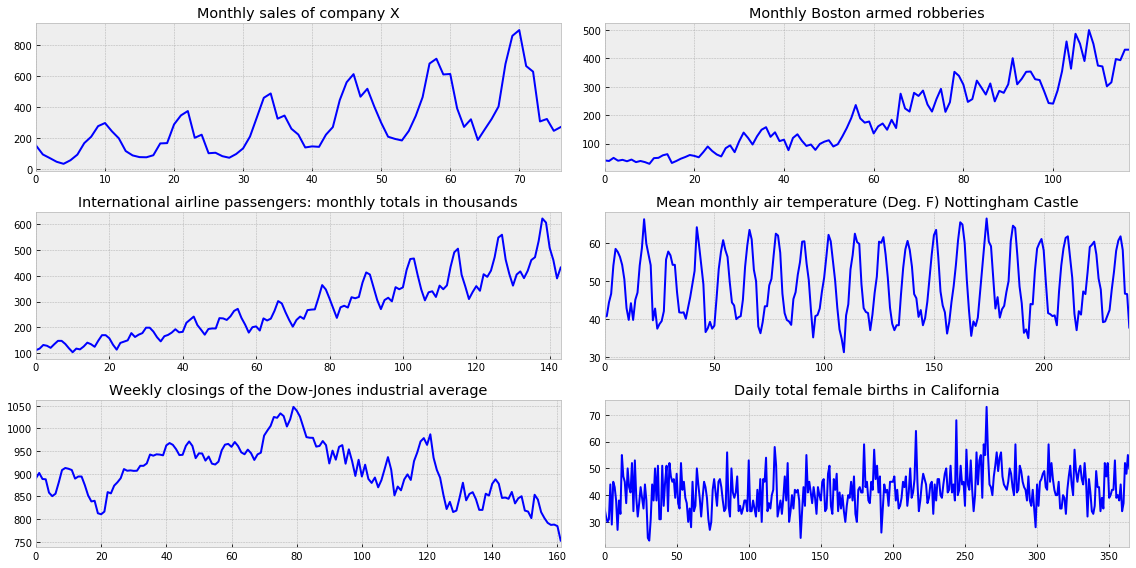

In [2]:
import pandas as pd
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

import matplotlib.pyplot as plt
%matplotlib inline

all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

def print_all(all_series):
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        layout = (3, 2)
        for i, key in enumerate(all_series.keys()):
            x = i % 2
            y = int((i - x) / 2)

            ts_ax = plt.subplot2grid(layout, (y, x))
            all_series[key].plot(ax=ts_ax, color='blue')
            ts_ax.set_title(key)

        plt.tight_layout()

print_all(all_series)

p-value: 0.16684549674178445 : Monthly sales of company X
p-value: 0.0005791258821324569 : Monthly Boston armed robberies
p-value: 0.0002485912311384022 : International airline passengers: monthly totals in thousands
p-value: 2.361163522472589e-12 : Mean monthly air temperature (Deg. F) Nottingham Castle
p-value: 0.009871226530993283 : Weekly closings of the Dow-Jones industrial average
p-value: 4.892374998454481e-14 : Daily total female births in California


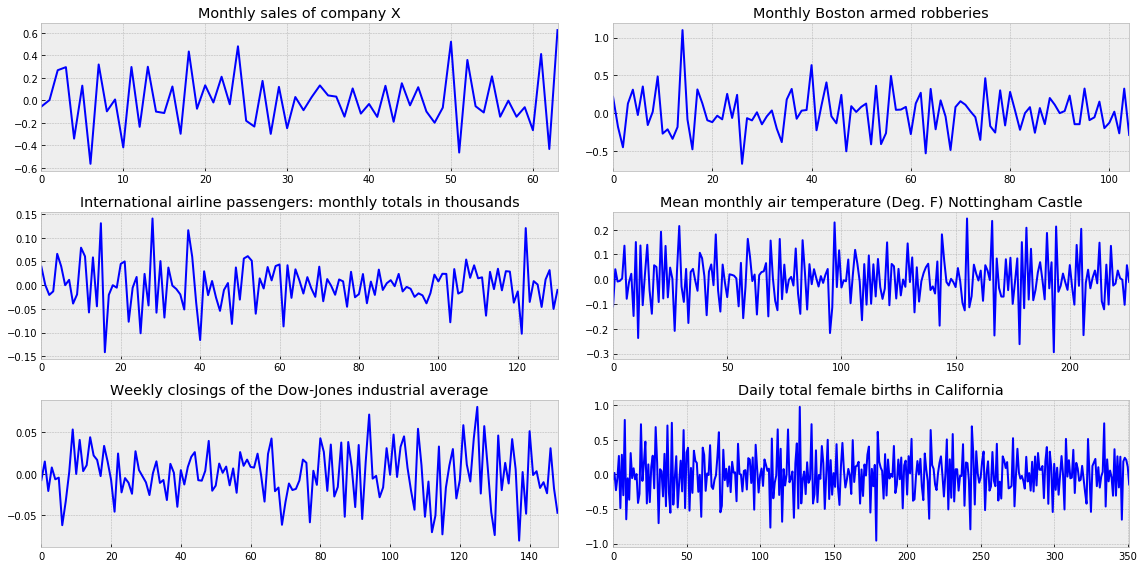

In [17]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

def make_stationary(series, name):
    series = boxcox(series, 0)
    series = series[1:] - series[:-1]
    series = series[12:] - series[:-12]
    autolag = "AIC"
    print(f"p-value: {adfuller(series, autolag=autolag)[1]} : {name}")
    return pd.Series(series)


all_stationary_series = {}

for name, series in all_series.items():
    all_stationary_series[name] = make_stationary(series, name)
    
print_all(all_stationary_series)

Видим, что не удалось сделать стационарным только "Monthly sales of company X". Все остальные, нуждались они в этом или нет, так или иначе, станционировались.
Изучим подробней "Monthly sales of company X"

p-value: 0.16684549674178445 : sales


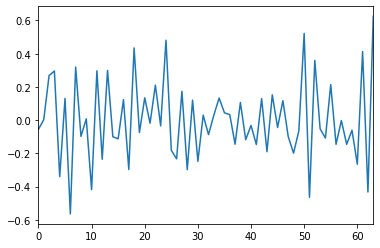

In [32]:
def make_sales_stationary(series, name):
    series = boxcox(series, 0)
    series = series[1:] - series[:-1]
    series = series[12:] - series[:-12]
    autolag = "AIC"
    print(f"p-value: {adfuller(series, autolag=autolag)[1]} : {name}")
    return pd.Series(series)

sales = make_sales_stationary(sales_of_company_x["Count"], "sales")

sales.plot()

Вот так вот - p-value почти на нуле, а я явно наблюдаю на графике какую-то сезонность. Что же это значит...
Воспользуемся чужим кусочком кода..

p-value: 5.597902762619477e-10 : sales


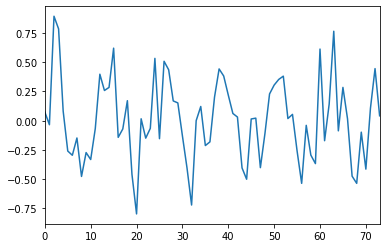

In [37]:
def make_sales_stationary2(series, name):
    series = boxcox(series, 0)
    series = series[1:] - series[:-1]
    series = series[2:] - series[:-2]
    autolag = "AIC"
    print(f"p-value: {adfuller(series, autolag=autolag)[1]} : {name}")
    return pd.Series(series)

sales = make_sales_stationary2(sales_of_company_x["Count"], "sales")

sales.plot()

Оп, вот теперь сработало. Что бы это ни было... Какую-то хрень чаще всего покупают раз в два месяца, и еще у нее тренд какой-то есть... Возможно связано с периодичностью рекламной кампании... 